<a href="https://colab.research.google.com/github/Aniket-76/Image-Classification/blob/main/Aniket_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import load_model


2.9.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def rgb_to_gray(image):
    image=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    image=np.resize(image,(image.shape[0],image.shape[1],1))
#     plt.imshow(image)
    return image

In [ ]:
train=ImageDataGenerator(rescale=1/255,
                         preprocessing_function=rgb_to_gray)
validation=ImageDataGenerator(rescale=(1/255),
                              preprocessing_function=rgb_to_gray)

In [ ]:
train_dataset=train.flow_from_directory('/content/drive/MyDrive/IMAGE_CLASSIFICATION/content/classes2/train/',
                                        target_size=(256,256),
                                        batch_size=32,
                                        class_mode='categorical')

validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/IMAGE_CLASSIFICATION/content/classes2/val/',
                                        target_size=(256,256),
                                        batch_size=32,
                                        class_mode='categorical')

Found 2025 images belonging to 3 classes.
Found 1571 images belonging to 3 classes.


In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(256,256,3)),
                                tf.keras.layers.MaxPool2D(2,2),
                                tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                                tf.keras.layers.MaxPool2D(2,2),
                                tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                                tf.keras.layers.MaxPool2D(2,2),
                                tf.keras.layers.Conv2D(512,(3,3),activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                                tf.keras.layers.MaxPool2D(2,2),
                                # tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                # tf.keras.layers.MaxPool2D(2,2),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(512,activation='relu'),
                                tf.keras.layers.Dense(256,activation='relu'),
                                tf.keras.layers.Dropout(0.5),
                                tf.keras.layers.Dense(3,activation='softmax')])

In [ ]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 127, 127, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 125, 125, 128)     147584    
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 60, 60, 256)       295168    
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 30, 30, 256)     

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer= RMSprop(lr=0.001),
              metrics=['accuracy'])
              

In [ ]:
model_fit=model.fit(train_dataset,
                    steps_per_epoch=48,
                    epochs=15,
                    validation_data=validation_dataset
        )

Epoch 1/15
48/48 [==============================] - 33s 663ms/step - loss: 4.6429 - accuracy: 0.3516 - val_loss: 1.9539 - val_accuracy: 0.4640
Epoch 2/15
48/48 [==============================] - 32s 668ms/step - loss: 1.7435 - accuracy: 0.4049 - val_loss: 1.4236 - val_accuracy: 0.4290
Epoch 3/15
48/48 [==============================] - 31s 647ms/step - loss: 1.2214 - accuracy: 0.4714 - val_loss: 0.9862 - val_accuracy: 0.6620
Epoch 4/15
48/48 [==============================] - 31s 644ms/step - loss: 1.0241 - accuracy: 0.5453 - val_loss: 0.9444 - val_accuracy: 0.6423
Epoch 5/15
48/48 [==============================] - 31s 646ms/step - loss: 0.9689 - accuracy: 0.5651 - val_loss: 0.8573 - val_accuracy: 0.6843
Epoch 6/15
48/48 [==============================] - 31s 655ms/step - loss: 0.9126 - accuracy: 0.5944 - val_loss: 0.9004 - val_accuracy: 0.6232
Epoch 7/15
48/48 [==============================] - 31s 653ms/step - loss: 0.9446 - accuracy: 0.5968 - val_loss: 0.8937 - val_accuracy: 0.6397

In [ ]:
train_dataset.class_indices

{'bear': 0, 'bed': 1, 'bicycle': 2}

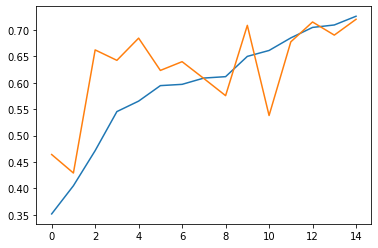

In [ ]:
plt.plot(model_fit.history['accuracy'],label='train')
plt.plot(model_fit.history['val_accuracy'],label='test')

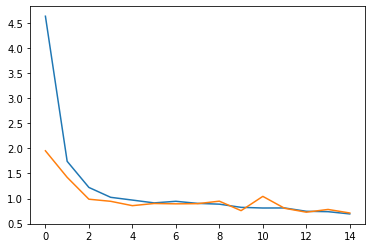

In [ ]:
plt.plot(model_fit.history['loss'],label='train')
plt.plot(model_fit.history['val_loss'],label='test')

In [ ]:
results=model.evaluate(validation_dataset[0][0],validation_dataset[0][1],batch_size=32)

1/1 [==============================] - 0s 122ms/step - loss: 0.6489 - accuracy: 0.7500


In [ ]:
test_dataset=validation.flow_from_directory('/content/drive/MyDrive/IMAGE_CLASSIFICATION/content/classes2/test/',
                                        target_size=(256,256),
                                        batch_size=32,
                                        class_mode='categorical')

Found 788 images belonging to 3 classes.


In [ ]:
results=model.evaluate(test_dataset[0][0],test_dataset[0][1],batch_size=48)

1/1 [==============================] - 0s 122ms/step - loss: 0.8028 - accuracy: 0.8438


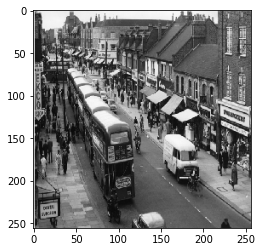

1/1 [==============================] - 0s 79ms/step
bicycle


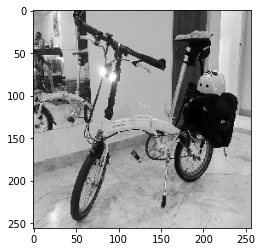

1/1 [==============================] - 0s 16ms/step
bicycle


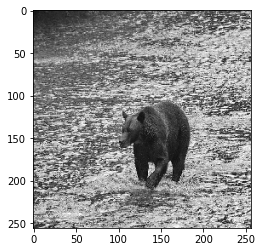

1/1 [==============================] - 0s 16ms/step
bear


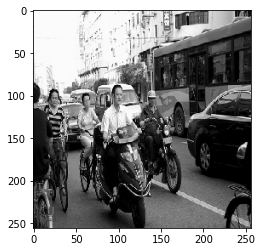

1/1 [==============================] - 0s 17ms/step
bicycle


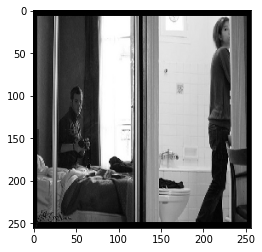

1/1 [==============================] - 0s 16ms/step
bed


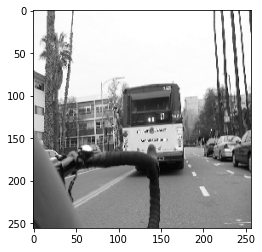

1/1 [==============================] - 0s 21ms/step
bicycle


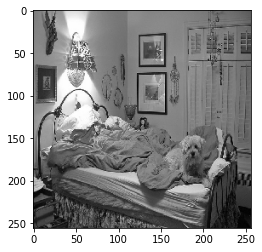

1/1 [==============================] - 0s 19ms/step
bed


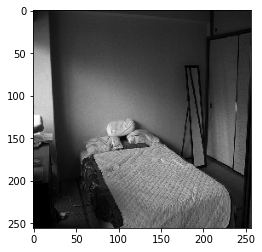

1/1 [==============================] - 0s 18ms/step
bed


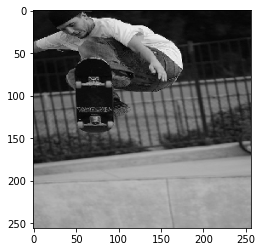

1/1 [==============================] - 0s 17ms/step
bed


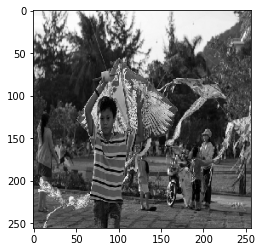

1/1 [==============================] - 0s 18ms/step
bicycle


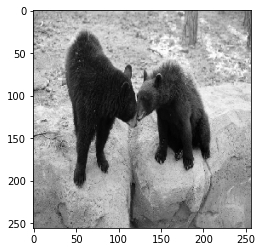

1/1 [==============================] - 0s 23ms/step
bear


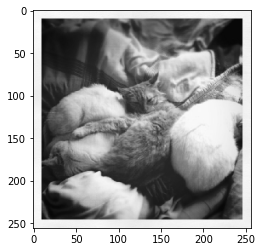

1/1 [==============================] - 0s 15ms/step
bed


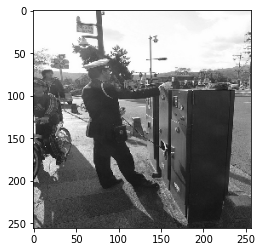

1/1 [==============================] - 0s 23ms/step
bicycle


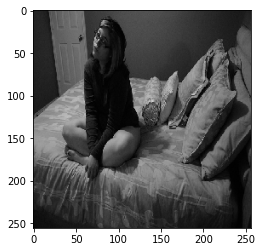

1/1 [==============================] - 0s 19ms/step
bed


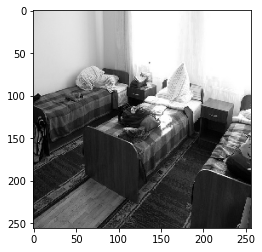

1/1 [==============================] - 0s 17ms/step
bed


In [ ]:
for i in range(15):
  
   img=test_dataset[0][0][i]
   plt.imshow(img)
   plt.show()

   x=image.img_to_array(img)
   x= np.expand_dims(x,axis=0)
   images=np.vstack([x])
   val=model.predict(images)
   val=np.argmax(val)
   if val==0:
     print('bear')
   elif val==1:
     print('bed')
   elif val==2:
     print('bicycle')
   
